In [1]:
%pip install mne
%pip install PyQT5

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mne
import os
import matplotlib
import matplotlib.pyplot as plt
import PyQt5
import eeg_config as config

In [3]:
%matplotlib qt

In [7]:
PARENT_PATH = "./eeg_data"
KOLORY_PATH = f"{PARENT_PATH}/Kolory"
TEST_PATH = f"{PARENT_PATH}/test_subject"
make_path = lambda parent, file:  parent + "/" + file

data_kolory_paths = [make_path(KOLORY_PATH, x) for x in os.listdir(path=KOLORY_PATH)]
data_test_paths = [make_path(TEST_PATH, x) for x in os.listdir(path=TEST_PATH)]

In [8]:
for i in range(len(data_test_paths)):
    raw = mne.io.read_raw_fif(data_test_paths[i], preload=True)
    # raw.apply_function(lambda x: x*1e-6)
    raw.drop_channels(["Accel_x", "Accel_y", "Accel_z", "Digital"])
    raw.plot(duration=60)

/home/grzesiek/HackYeah/venv/lib/python3.10/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/home/grzesiek/HackYeah/venv/lib/python3.10/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/home/grzesiek/HackYeah/venv/lib/python3.10/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_77526/472100299.py:1: UserWarning: Zero value in spectrum for channels Fp1, Fp2, O1, O2
  raw.compute_psd(fmax=120).plot(picks="eeg", exclude="bads", amplitude=False)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_77526/472100299.py:1: UserWarning: Infinite value in PSD for channels Fp1, Fp2, O1, O2.
These channels might be dead.
  raw.compute_psd(fmax=120).plot(picks="eeg", exclude="bads", amplitude=False)


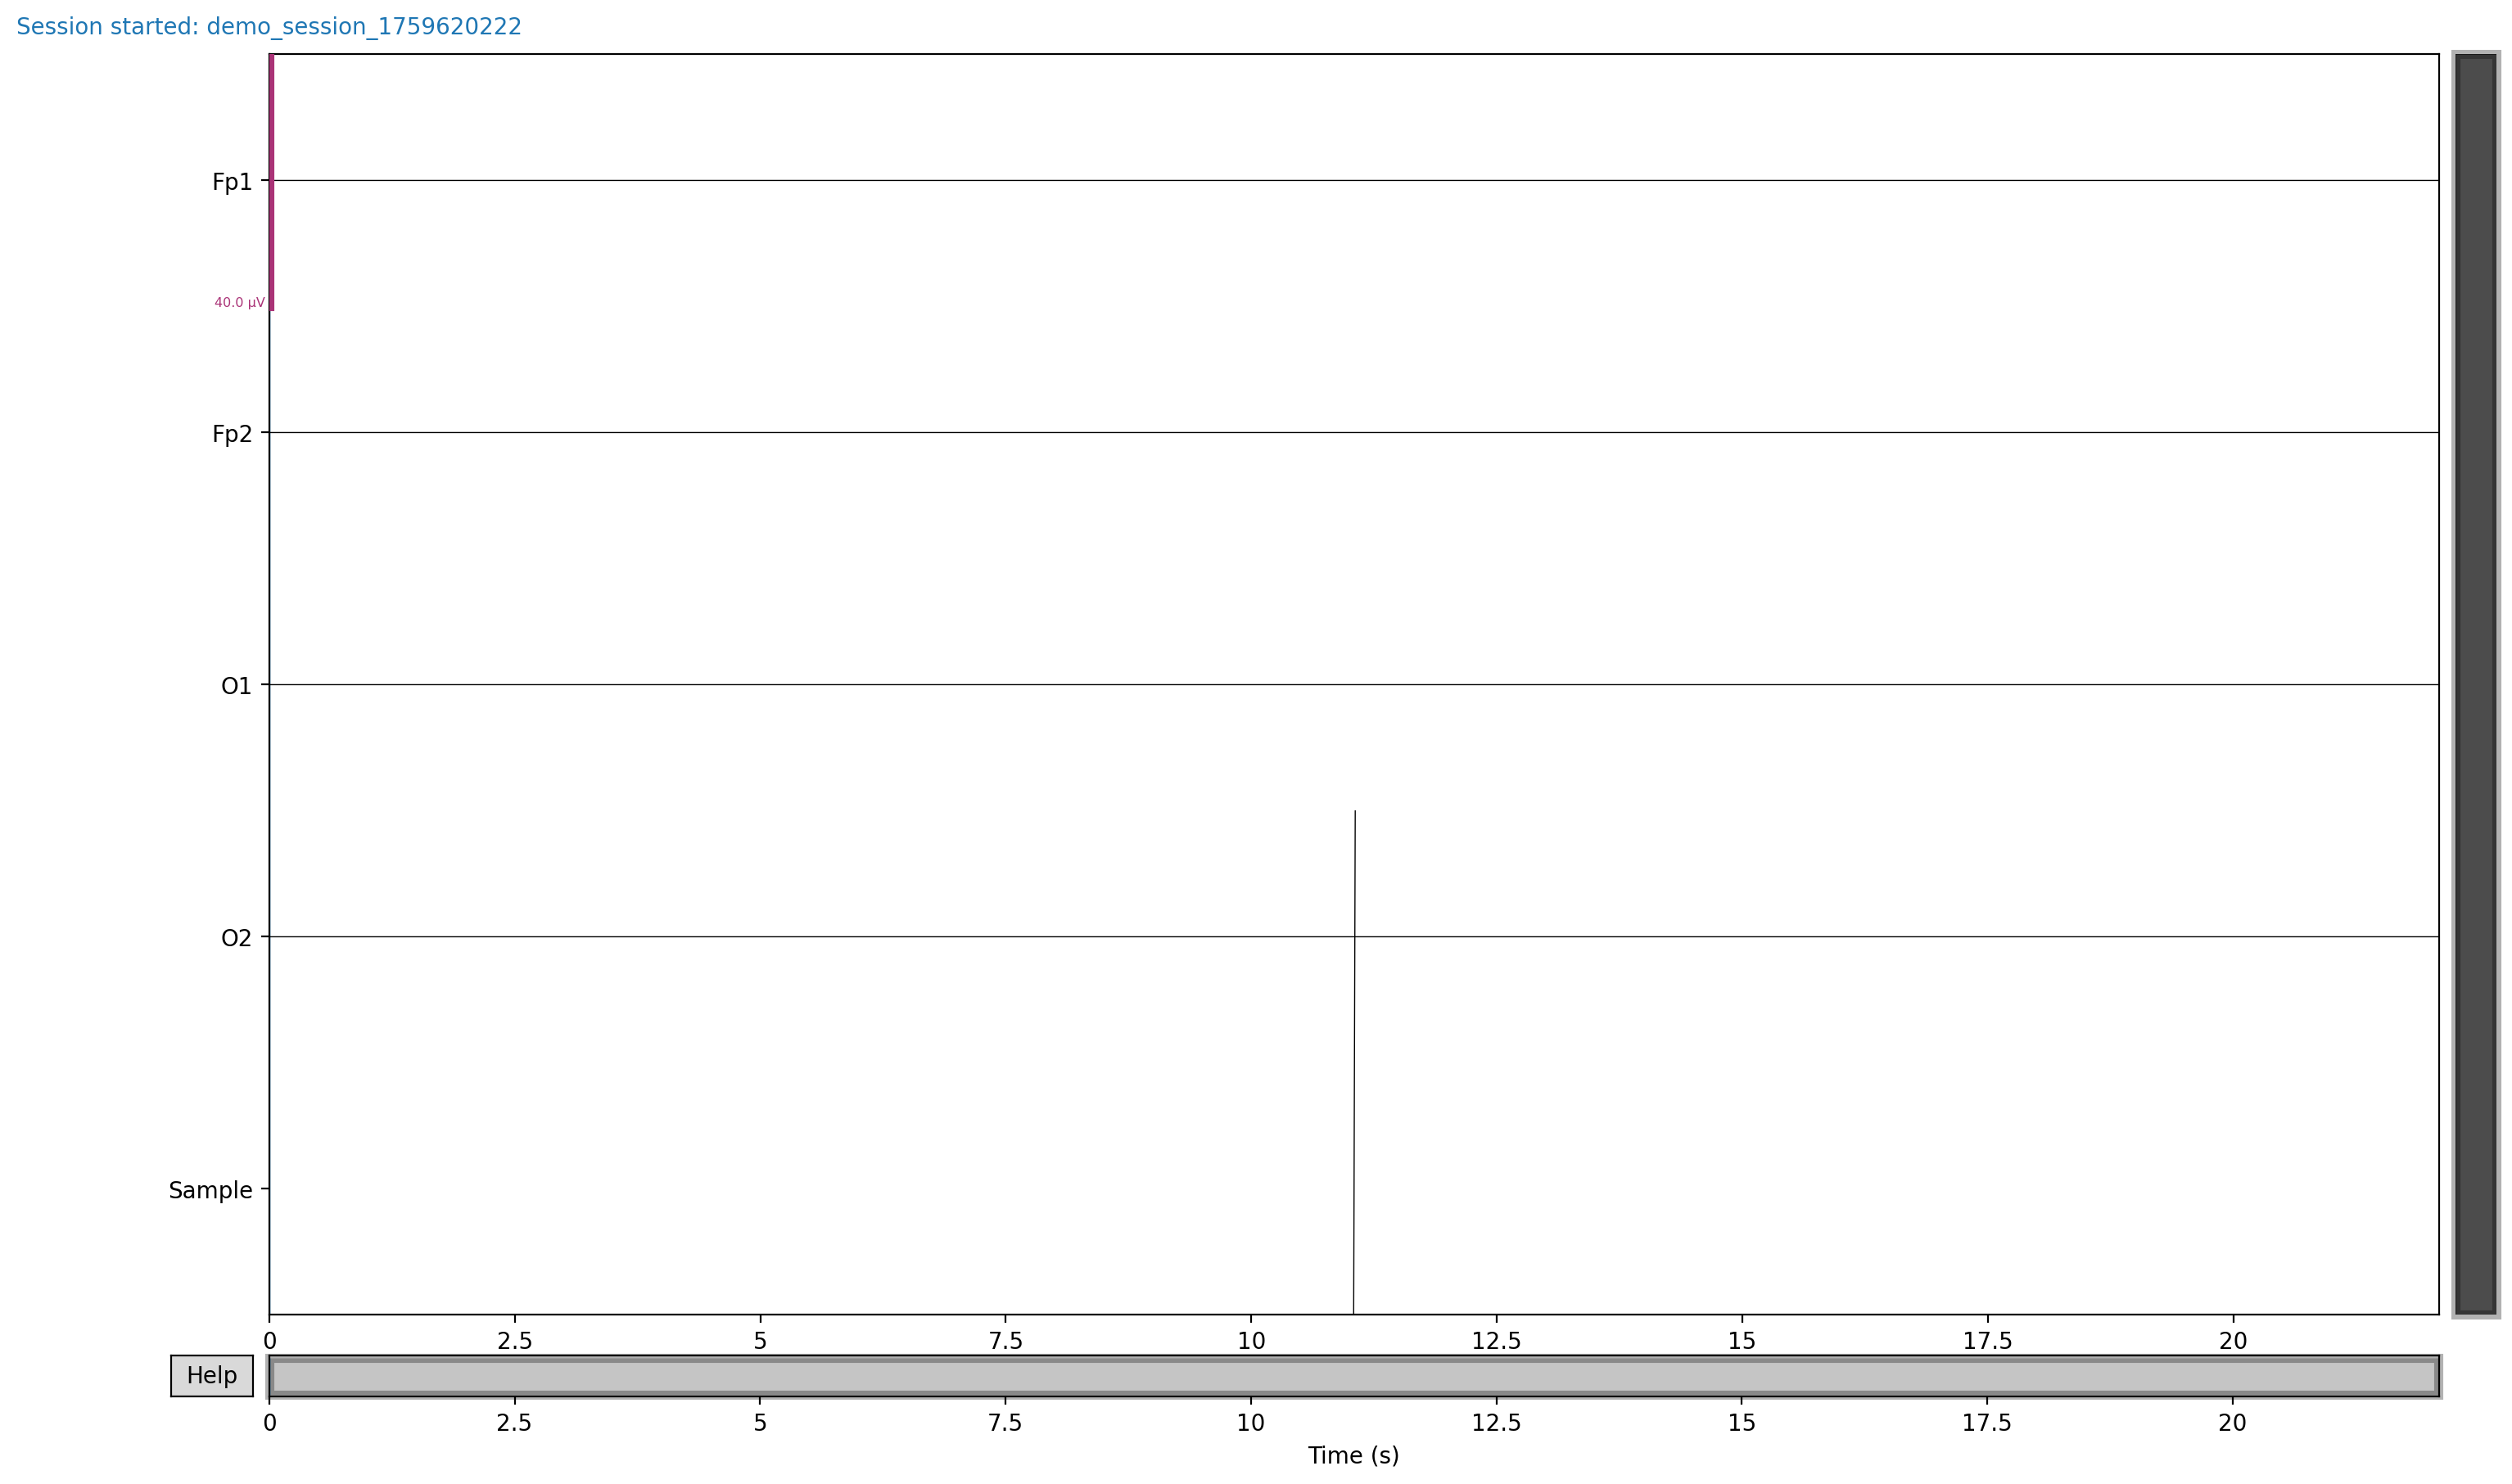

Channels marked as bad:
none


In [32]:
raw.compute_psd(fmax=120).plot(picks="eeg", exclude="bads", amplitude=False)
raw.plot(duration=60, n_channels=30)